To find patterns in a frequency table we have to look up; 
* The **frequency** of **each unique value** or 
* **Class interval** and 
* At the same time compare the frequencies. 

This process can get time consuming for tables with many unique values or class intervals, or when the frequency values are large and hard to compare against each other.

Graphs make it much easier to scan and compare frequencies, providing us with a single picture of the entire distribution of a variable. Graphs are a better choice over frequency tables if we need to present our findings to a non-technical audience.

For variables measured on a 
* nominal or 
* an ordinal scale 

it's common to use a **bar plot** to visualize their distribution. To generate a bar plot for the distribution of a variable we need two sets of values:

* One set containing the unique values.
* Another set containing the frequency for each unique value.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

pd.set_option("max_columns",250)

In [2]:
wnba = pd.read_csv("wnba.csv")
wnba.head(2)

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,15:00,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,2,8,173,30,85,35.3,12,32,37.5,21,26,80.8,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,12,30,947,90,177,50.8,5,18,27.8,32,41,78.0,19,82,101,72,63,13,40,217,0,0


In [3]:
wnba["Experience"].value_counts()

R     23
3     19
6     14
5     14
1     12
9     11
2     11
4     11
10     5
11     4
7      4
12     4
8      3
14     3
13     3
15     2
Name: Experience, dtype: int64

In [4]:
def category(x):
    
    if pd.isnull(x):
        return "Rookie"
    elif 0< x <= 3:
        return "Little experience"
    elif 3< x <= 5:
        return "Experienced"
    elif 5< x <= 10:
            return "Very experienced"
    elif x > 10:
        return "Veteran"
        

In [5]:
wnba["Exp_ordinal"] = pd.to_numeric(wnba["Experience"], errors = "coerce").apply(category)

wnba["Exp_ordinal"].value_counts()

Little experience    42
Very experienced     37
Experienced          25
Rookie               23
Veteran              16
Name: Exp_ordinal, dtype: int64

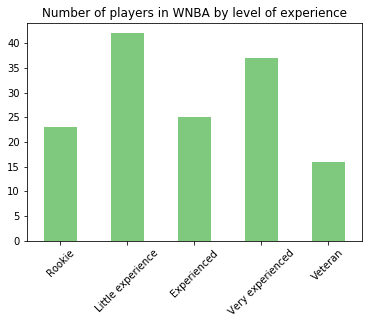

In [29]:
# bar plot to display the distribution of the Exp_ordinal variable
wnba["Exp_ordinal"].value_counts().iloc[[3,0,2,1,4]].plot.bar(colormap = plt.cm.Accent, 
                                                              title = "Number of players in WNBA by level of experience"
                                                              , rot = 45)
plt.show()

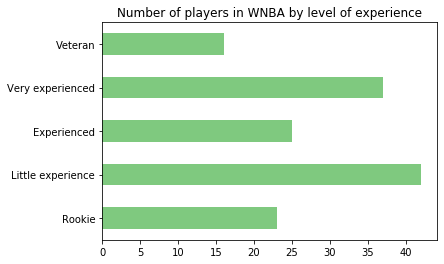

In [30]:
wnba["Exp_ordinal"].value_counts().iloc[[3,0,2,1,4]].plot.barh(colormap = plt.cm.Accent, 
                                                              title = "Number of players in WNBA by level of experience"
                                                              )

plt.show()

Another kind of graph we can use to visualize the distribution of **nominal** and **ordinal** variables is a **pie chart**. 

Just as the name suggests, a pie chart is structured pretty much like a regular pie: it takes the form of a circle and is divided in **wedges**. 
* Each wedge in a pie chart represents a category (one of the unique labels), and 
* the size of each wedge is given by the proportion (or percentage) of that category in the distribution.

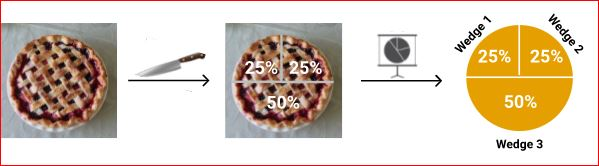

In [8]:
Image("pie.JPG")

The main advantage of pie charts over bar plots is that they provide a much better sense for the **relative frequencies (proportions and percentages)** in the distribution. 

Looking at a bar plot, we can see that categories are more or less numerous than others, but it's really hard to tell what proportion in the distribution each category takes.

With **pie charts**, we can immediately get a visual sense for the proportion each category takes in a distribution. Just by eyeballing the pie chart, we can make a series of observations in terms of proportions:

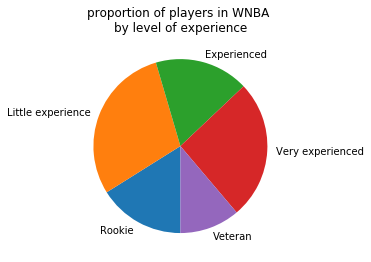

In [13]:
wnba["Exp_ordinal"].value_counts().iloc[[3,0,2,1,4]].plot.pie(startangle = -90, counterclock = False, 
                                                              wedgeprops = {"linewidth":0},
                                                              title = "proportion of players in WNBA \nby level of experience")
plt.ylabel("")
plt.show()

The pie chart we generated is more an ellipsis than a circle, and the `Exp_ordinal` label is unaesthetic and hard to read. To give a pie chart the right shape, we need to specify equal values for **height** and **width** in the `figsize parameter` of `Series.plot.pie()`

Ideally, we'd have proportions or percentages displayed on each wedge of the pie chart. Fortunately, this is easy to get using the `autopct` parameter. This parameter accepts Python string formatting, and we'll use the string `'%.1f%%'` to have percentages displayed with a **precision of one decimal place**.

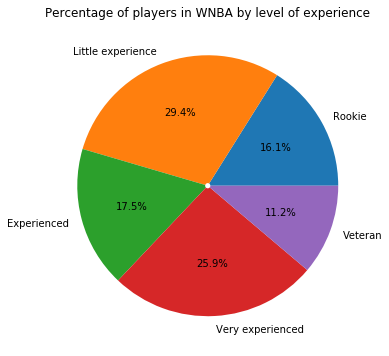

In [27]:
(wnba["Exp_ordinal"].value_counts(normalize = True).iloc[[3,0,2,1,4]]*100).plot.pie(autopct = "%.1f%%", 
                                                                                    title = "Percentage of players in WNBA by level of experience", 
                                                                                   figsize = (6,6),
                                                                                   wedgeprops = {"linewidth":1,"width":.98})
plt.ylabel("")
plt.show()

Because of the special properties of variables measured on **interval** and **ratio scales**, we can describe distributions in more elaborate ways. 

In [92]:
print(wnba['PTS'].describe())

count    143.000000
mean     201.790210
std      153.381548
min        2.000000
25%       75.000000
50%      177.000000
75%      277.500000
max      584.000000
Name: PTS, dtype: float64


* We can see that 75% of the values are distributed within a relatively narrow interval (between 2 and 277), 
* While the remaining 25% are distributed in an interval that's slightly larger. 

To visualize the distribution of the `PTS` variable, we need to use a graph that allows us to see immediately the patterns outlined above. The most commonly used graph for this scenario is the **histogram**.

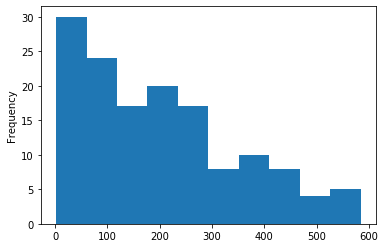

In [28]:
wnba["PTS"].plot.hist()
plt.show()

Under the hood, the `wnba['PTS'].plot.hist()` method:

* Generated a grouped frequency distribution table for the` PTS` variable with **ten class intervals**.
* For **each class interval** it **plotted a bar** with a **height corresponding to the frequency of the interval**.

In [94]:
print(wnba['PTS'].value_counts(bins = 10).sort_index())

(1.417, 60.2]     30
(60.2, 118.4]     24
(118.4, 176.6]    17
(176.6, 234.8]    20
(234.8, 293.0]    17
(293.0, 351.2]     8
(351.2, 409.4]    10
(409.4, 467.6]     8
(467.6, 525.8]     4
(525.8, 584.0]     5
Name: PTS, dtype: int64


Each bar in the histogram corresponds to one class interval.

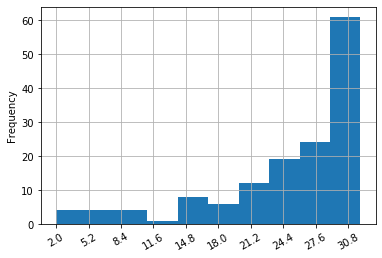

In [31]:
# print(wnba["Games Played"].describe())
# print(wnba["Games Played"].value_counts(bins = 10).sort_index())

wnba["Games Played"].plot.hist(grid = True,rot = 30, xticks = np.arange(2,32,3.2))
plt.show()

It should now be clear that a **histogram** is basically the **visual form of a grouped frequency table**. 
* Structurally, a **histogram** can also be understood as a **modified version of a bar plot**. 
* The main difference is that in the case of a **histogram there are no gaps between bars**, and **each bar represents an interval**, **not a single value**.

The main reason we remove the gaps between bars in case of a histogram is that we want to show that the **class intervals** we plot **are adjacent to one another**. **With the exception of the last interval**, the **ending point of an interval** is the **starting point of the next interval**, and we want that to be seen on the graph.

For **bar plots** we **add gaps** because in most cases **we don't know whether the unique values of ordinal variables are adjacent to one another** in the same way as two class intervals are. It's **safer to assume that the values are not adjacent**, and **add gaps**.

For **nominal variables**, values **can't be numerically adjacent in principle**, and we add gaps to emphasize that the values are fundamentally distinct.

We'll often want to avoid letting pandas work out the intervals, and use instead intervals that we think make more sense. We can do this in two steps:

* We start with specifying the range of the entire distribution using the **range parameter** of `Series.plot.hist()`.
* Then we **combine that with the number of bins** to **get the intervals** we want.

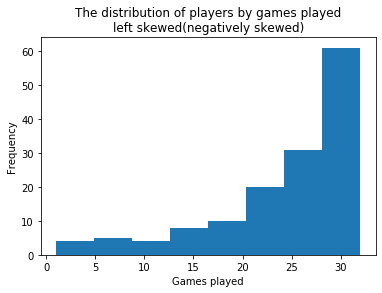

In [33]:
#  bin must cover an interval of 4 games. The first bin must start at 1, the last bin must end at 32.

wnba["Games Played"].plot.hist(range = (1,32), bins = 8,title = "The distribution of players by games played\nleft skewed(negatively skewed)")
plt.xlabel("Games played")
plt.show()

# Skewed distributions

In a skewed distribution:

* The **values pile up toward the end or the starting point** of the range, **making up the body of the distribution**.
* Then the **values decrease in frequency toward the opposite end**, forming **the tail** of the distribution.

* If the **tail points to the left**, then the **distribution is said to be `left skewed`**. 
* When **it points to the left**, the tail points at the same time in the **direction of negative numbers**, and for this reason **the distribution is sometimes also called `negatively skewed`**.
* If the **tail points to the right**, then the distribution is **right skewed**. The distribution is sometimes also said to be **positively skewed** because the **tail points in the direction of positive numbers**.

# Symmetrical Distribution`

Besides skewed distributions, we often see histograms with a shape that is more or less symmetrical. If we draw a vertical line exactly in the middle of a symmetrical histogram, then we'll divide the histogram in two halves that are mirror images of one another.

If the shape of the histogram is symmetrical, then we say that we have a symmetrical distribution.

A very common symmetrical distribution is one where the values pile up in the middle and gradually decrease in frequency toward both ends of the histogram. This pattern is specific to what we call a **normal distribution (also called Gaussian distribution)**.

Another common symmetrical distribution is one where the values are distributed uniformly across the entire range. This pattern is specific to a **uniform distribution.**

We learned about the graphs we can use to visualize the distributions of various kinds of variables.
* If a variable is measured on a **nominal** or **ordinal scale**, we can use a **bar plot** or **a pie chart**. 
* If the variable is measured on an **interval** or **ratio scale**, then a **histogram** is good choice.